# pyPanair Tutorial#2 Tapered Wing  
In this tutorial we will perform an analysis of a tapered wing.  
The wing is defined by five different wing sections at $\eta=0.000, 0.126, 0.400, 0.700, 1.000$.  

Below are the wing planform and airfoil stack, respectively.
(The wing is based on the [DLR-F4<sup>1</sup>](https://aiaa-dpw.larc.nasa.gov/Workshop1/files/agard-ar-303.pdf))

![planform](planform.png)

<IPython.core.display.Javascript object>


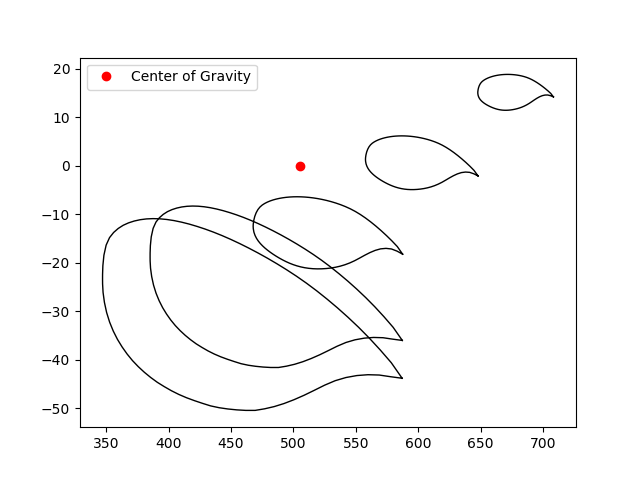

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pyPanair.preprocess import wgs_creator
for eta in ("0000", "0126", "0400", "0700", "1000"):
    af = wgs_creator.read_airfoil("eta{}.csv".format(eta)) 
    plt.plot(af[:,0], af[:,2], "k-", lw=1.)
plt.plot((504.9,), (0,), "ro", label="Center of Gravity")
plt.legend()
plt.show()

## 1.Defining the geometry
Just as we have done in tutorial 1, we will use the `wgs_creator` module to define the geometry of the wing.

First off, we initialize a `LaWGS` object.

In [1]:
from pyPanair.preprocess import wgs_creator
wgs = wgs_creator.LaWGS("tapered_wing")

Next, we create a `Line` object that defines the coordinates of the airfoil at the root of the wing.  
To do so, we will read a csv file that contains the coordinates of the airfoil, using the `read_airfoil` function.  

Three csv files, `root.csv`, `kink.csv`, and `tip.csv` have been prepared for this tutorial.  

Before we creating the `Line` object, we will take a quick view of these files.
For example, the `root.csv` looks like ...


In [2]:
import pandas as pd
pd.set_option("display.max_rows", 10)
pd.read_csv("root.csv")

,xup,zup,xlow,zlow
0,0.000000,0.000000,0.000000,0.000000
1,0.000602,0.003165,0.000602,-0.003160
2,0.002408,0.006306,0.002408,-0.006308
3,0.005412,0.009416,0.005412,-0.009443
4,0.009607,0.012480,0.009607,-0.012559
...,...,...,...,...
60,0.990393,0.002001,0.990393,0.000497
61,0.994588,0.001137,0.994588,0.000296
62,0.997592,0.000510,0.997592,0.000137
63,0.999398,0.000128,0.999398,0.000035
